In [52]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combine the data into a single dataset
cityRide = pd.merge(ride_data, city_data, on='city')

# Display the data table for preview
cityRide.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


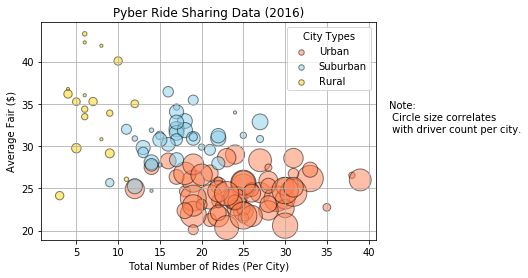

In [53]:
# Obtain the x and y coordinates for each of the three city types
city = cityRide.groupby(['city'])
city = city.mean()
del city['driver_count']
city['rides'] = cityRide['city'].value_counts()
city = pd.merge(city, city_data, how='left', on='city')

urban = city[city['type']=='Urban']
urban_x_axis = urban['rides']
urban_y_axis = urban['fare']
suburban = city[city['type']=='Suburban']
suburban_x_axis = suburban['rides']
suburban_y_axis = suburban['fare']
rural = city[city['type']=='Rural']
rural_x_axis = rural['rides']
rural_y_axis = rural['fare']


# Build the scatter plots for each city types
plt.figure()
plt.scatter(urban_x_axis, urban_y_axis, marker="o", s=(urban['driver_count']*10), facecolors='Coral', 
            edgecolors="black", alpha=0.5, label='Urban')
plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", s=(suburban['driver_count']*10), facecolors='SkyBlue', 
            edgecolors="black", alpha=0.5, label='Suburban')
plt.scatter(rural_x_axis, rural_y_axis, marker="o", s=(rural['driver_count']*10), facecolors='Gold', 
            edgecolors="black", alpha=0.5, label='Rural')


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fair ($)")
plt.grid()

# Create a legend
lgnd = plt.legend(loc="upper right", title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
side_text = plt.figtext(0.93, 0.5, 'Note: \n Circle size correlates \n with driver count per city.')

# Save Figure
plt.savefig('output/pyber_ride_share_data.png', bbox_extra_artists=(side_text,), bbox_inches='tight')
plt.show()



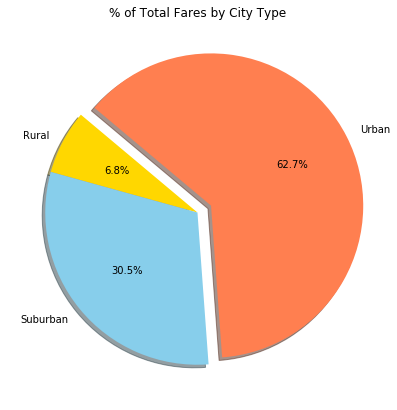

In [54]:
# Calculate Type Percents
urbanFares = cityRide[cityRide['type']=='Urban']
suburbanFares = cityRide[cityRide['type']=='Suburban']
ruralFares = cityRide[cityRide['type']=='Rural']
fares = [ruralFares['fare'].sum(), suburbanFares['fare'].sum(), urbanFares['fare'].sum()]
labels = ['Rural', 'Suburban', 'Urban']
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

# Build Pie Chart
plt.figure(figsize=(10,7))
plt.pie(fares, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig('output/fares_city_type.png', bbox_extra_artists=(side_text,), bbox_inches='tight')
plt.show()

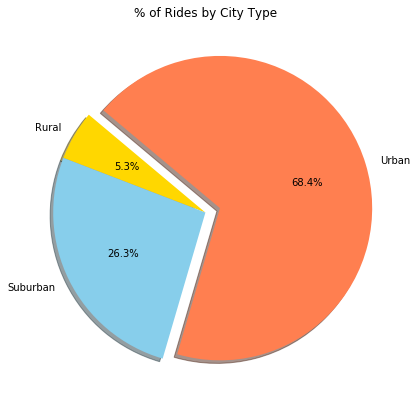

In [55]:
# Calculate Ride Percents
rides = [ruralFares['ride_id'].count(), suburbanFares['ride_id'].count(), urbanFares['ride_id'].count()]
labels = ['Rural', 'Suburban', 'Urban']
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)
# Build Pie Chart
plt.figure(figsize=(10,7))
plt.pie(rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Rides by City Type")
# Save Figure
plt.savefig('output/rides_city_type.png', bbox_extra_artists=(side_text,), bbox_inches='tight')
plt.show()

Text(0.5, 1.0, '% of Total Drivers by City Type')

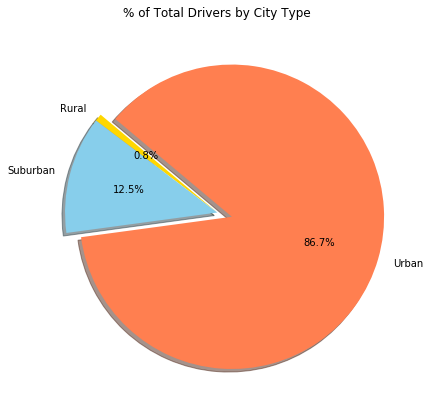

In [57]:
# Calculate Driver Percents
drivers = [rural['driver_count'].sum(), suburban['driver_count'].sum(), urban['driver_count'].sum()]
labels = ['Rural', 'Suburban', 'Urban']
colors = ["Gold", "SkyBlue", "Coral"]
explode = (0, 0, 0.1)

# Build Pie Charts
plt.figure(figsize=(10,7))
plt.pie(drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")

# Save Figure


In [58]:
urban

,city,fare,ride_id,rides,driver_count,type
0,Amandaburgh,24.641667,5.359336e+12,18,12,Urban
1,Barajasview,25.332273,4.676968e+12,22,26,Urban
6,Carriemouth,28.314444,5.184855e+12,27,52,Urban
7,Christopherfurt,24.501852,4.582307e+12,27,41,Urban
10,Deanville,25.842632,4.901508e+12,19,49,Urban
13,East Kaylahaven,23.757931,4.624814e+12,29,65,Urban
16,Erikaland,24.906667,4.483433e+12,12,37,Urban
18,Grahamburgh,25.221200,4.162242e+12,25,61,Urban
21,Huntermouth,28.993750,4.280488e+12,24,37,Urban
22,Hurleymouth,25.891429,5.650851e+12,28,36,Urban
